In [ ]:
# 2-layer simple NN

In [1]:
import torch
import matplotlib.pyplot as plt

In [ ]:
"""
Forward pass
y1 = W1(x) 
y2 = relu(W1(x))
y3 = W2(relu(W1(x)))

loss function: (y3-y)**2

Backward pass > backpropagation
dw1, dw2
"""

In [48]:
n, d_in, d_out, h = 64, 1000, 10, 10
epochs = 100
lr = 1e-5

device= torch.device('cpu')

w1 = torch.randn((d_in,h), device=device)
w2 = torch.randn((h,d_out), device=device)

x = torch.randn((n,d_in), device=device)
y = torch.randn((n,d_out), device=device)

1832697.5
932767.375
372209.96875
102380.0703125
62000.75390625
46222.890625
35773.26953125
28396.22265625
23006.09375
18959.373046875
15853.30859375
13425.18359375
11497.1201171875
9945.3251953125
8681.7333984375
7642.126953125
6778.67626953125
6055.369140625
5444.759765625
4925.6279296875
4481.23583984375
4098.48193359375
3766.888916015625
3477.997314453125
3225.00146484375
3002.322509765625
2805.411865234375
2630.52783203125
2474.4921875
2334.7177734375
2209.041748046875
2095.71142578125
1993.111328125
1899.8887939453125
1814.937255859375
1737.302978515625
1666.1990966796875
1600.8682861328125
1540.69775390625
1485.1572265625
1433.7825927734375
1386.1697998046875
1341.9613037109375
1300.841552734375
1262.53369140625
1226.791259765625
1193.395751953125
1162.152099609375
1132.885009765625
1105.4375
1079.6683349609375
1055.448974609375
1032.666015625
1011.2147827148438
991.0
971.933837890625
953.9392700195312
936.943603515625
920.8792724609375
905.6865234375
891.309326171875
877.696350

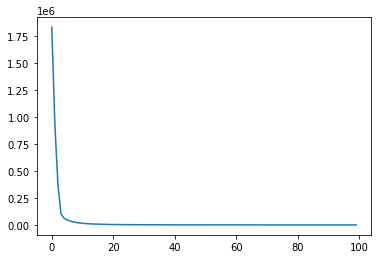

In [49]:
error = []
for num in range(epochs):
  y1 = x.mm(w1) # n x h
  y2 = y1.clamp(min=0) #same
  y3 = y2.mm(w2) # n x d_out

  loss = (y3 - y).pow(2).sum()
  print(loss.item())
  error.append(loss.item())

  #backprop
  loss_grad_y3 = 2 * (y3-y)  # n x d_out 
  grad_w2 = y2.t().mm(loss_grad_y3) # h x d_out, needs to have same dim as w2
  grad_y2 = loss_grad_y3.mm(w2.t())  # n x h
  grad_y1 = grad_y2.clone() 
  grad_y1 [y1<0] = 0
  grad_w1 = x.t().mm(grad_y1) # h x d_in, needs to have same dim as w1

  w1-= lr * grad_w1
  w2-= lr * grad_w2

plt.plot(error)




2107215360.0
677132992.0
372430848.0
265696352.0
201815328.0
159812816.0
130451920.0
108914272.0
92621112.0
79932784.0
69814064.0
61588960.0
54793764.0
49089536.0
44239744.0
40093484.0
36518480.0
33412148.0
30688492.0
28283858.0
26152454.0
24256472.0
22559894.0
21035410.0
19660386.0
18414870.0
17283168.0
16251282.0
15307546.0
14442116.0
13646373.0
12912773.0
12235316.0
11608437.0
11027057.0
10486901.0
9984253.0
9515772.0
9078359.0
8669222.0
8286041.0
7926733.0
7588758.5
7271159.0
6972372.5
6690973.0
6425594.5
6174998.0
5938141.5
5714037.0
5501692.0
5300367.0
5109394.0
4928064.0
4755696.0
4591738.5
4435727.5
4287145.5
4145611.25
4010678.5
3881922.25
3758963.5
3641477.5
3529135.25
3421640.75
3317716.0
3218379.0
3123294.0
3031929.0
2944405.25
2860509.0
2780036.75
2702787.25
2628586.5
2557271.25
2488687.0
2422715.25
2359208.75
2298039.0
2239102.0
2182289.75
2127508.5
2074660.75
2023663.25
1974427.75
1926877.75
1880941.125
1836534.75
1793603.25
1752080.75
1711908.75
1673030.75
1635393.375
1

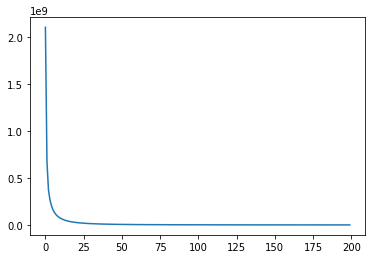

In [72]:
n, d_in, d_out, h = 64, 10000, 100, 60
lr = 1e-7
epochs = 200

x = torch.randn((n,d_in), device=device)
y = torch.randn((n, d_out), device=device)

w1 = torch.randn((d_in, h), device=device, requires_grad=True)
w2 = torch.randn((h, d_out), device=device, requires_grad=True)

error = []
for num in range(epochs):

  y1 = x.mm(w1)
  y2 = y1.clamp(min=0)
  y3 = y2.mm(w2)

  loss = (y3 - y).pow(2).sum()
  print(loss.item())
  error.append(loss.item())

  loss.backward()

  with torch.no_grad():
    w1-= lr*w1.grad
    w2-= lr*w2.grad

    w1.grad.zero_()
    w2.grad.zero_()
plt.plot(error)


**3 layer NN**

806626852864.0
768034275328.0
732217344000.0
698882981888.0
667770945536.0
638712414208.0
611528933376.0
586044407808.0
562110267392.0
539610906624.0
518435176448.0
498487328768.0
479668174848.0
461891993600.0
445059104768.0
429121372160.0
414020894720.0
399717531648.0
386145320960.0
373254193152.0
360980480000.0
349282467840.0
338130960384.0
327493091328.0
317341433856.0
307640958976.0
298364370944.0
289480638464.0
280976261120.0
272827580416.0
265015787520.0
257530691584.0
250355007488.0
243468943360.0
236854296576.0
230496845824.0
224380895232.0
218497417216.0
212838858752.0
207392948224.0
202151837696.0
197106352128.0
192247709696.0
187556741120.0
183030693888.0
178660900864.0
174441168896.0
170366517248.0
166430261248.0
162624077824.0
158943346688.0
155383971840.0
151938842624.0
148603387904.0
145372856320.0
142243086336.0
139209113600.0
136269635584.0
133418500096.0
130652250112.0
127969468416.0
125366861824.0
122840334336.0
120386494464.0
118004514816.0
115690184704.0
1134398423

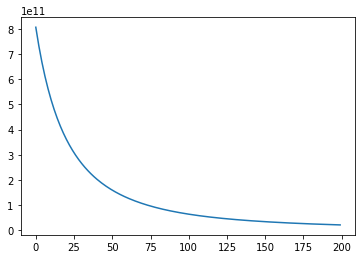

In [74]:
# 3-layer NN
n, d_in, d_out, h = 64, 100000, 1000, 10
d_out1 = 50
lr = 1e-12
epochs = 200

x = torch.randn((n,d_in), device=device)
y = torch.randn((n, d_out), device=device)

w1 = torch.randn((d_in, h), device=device, requires_grad=True)
w2 = torch.randn((h, d_out1), device=device, requires_grad=True)
w3 = torch.randn((d_out1, d_out), device=device, requires_grad=True)

error = []
for num in range(epochs):

  y1 = x.mm(w1)
  y2 = y1.clamp(min=0)
  y3 = y2.mm(w2)
  y4 = y3.clamp(min=0)
  y5 = y4.mm(w3)

  loss = (y5 - y).pow(2).sum()
  print(loss.item())
  error.append(loss.item())

  loss.backward()

  with torch.no_grad():
    w1-= lr*w1.grad
    w2-= lr*w2.grad
    w3-= lr*w3.grad

    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()

plt.plot(error)


**Custom nn.Modules**

0.3787941634654999
2.3327181339263916
0.3991425633430481
0.3552205562591553
0.3546806275844574
0.35406795144081116
0.35340359807014465
0.3527003228664398
0.3519667088985443
0.35120880603790283
0.3504309058189392
0.3496365249156952
0.3488282859325409
0.34800824522972107
0.347178190946579
0.3463395833969116
0.3454936146736145
0.3446413278579712
0.3437836170196533
0.3429211378097534
0.34205472469329834
0.3411848545074463
0.34031200408935547
0.33943676948547363
0.3385593891143799
0.3376803696155548
0.33679988980293274
0.3359183967113495
0.3350360095500946
0.33415308594703674
0.33326977491378784
0.3323862850666046
0.3315027952194214
0.3306194543838501
0.32973647117614746
0.32885390520095825
0.3279719650745392
0.32709065079689026
0.3262101709842682
0.32533058524131775
0.3244519829750061
0.323574423789978
0.32269805669784546
0.3218229413032532
0.3209490180015564
0.32007649540901184
0.3192053437232971
0.3183356523513794
0.31746748089790344
0.31660085916519165
0.3157358467578888
0.3148724436759

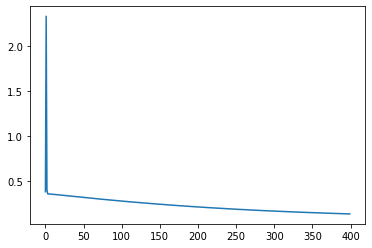

In [8]:
n, d_in, d_out, h = 64, 10000, 100, 30
lr = 1e-3
epochs = 400
device = torch.device('cpu')

model = torch.nn.Sequential(
        torch.nn.Linear(d_in, h),
        torch.nn.ReLU(),
        torch.nn.Linear(h, d_out))

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr)
    
x = torch.rand((n, d_in), device=device, requires_grad=True)
y = torch.rand((n, d_out), device=device, requires_grad=True)

error = []
# for p in model.parameters():
#   print(p)
for num in range(epochs):
  
  y_pred = model(x) #pass input to the object as argument
  
  loss = loss_fn(y_pred, y)
  print(loss.item())
  error.append(loss.item())

  optimizer.zero_grad() # optimizer zero_grad usuallu used
  # backpropagate
  loss.backward()

  # optimiser step updates
  optimizer.step()

plt.plot(error)

6820.009765625
5630.78759765625
5411.2001953125
5281.33056640625
5168.09423828125
5059.59375
4951.7021484375
4843.13427734375
4737.13427734375
4631.52490234375
4526.892578125
4422.3828125
4318.63720703125
4216.466796875
4110.12158203125
4005.072265625
3903.2451171875
3803.010986328125
3694.69677734375
3591.869140625
3490.9921875
3393.9443359375
3300.101806640625
3206.27392578125
3118.398681640625
3033.62646484375
2952.356201171875
2873.910400390625
2798.76123046875
2726.376953125
2657.33154296875
2589.94873046875
2525.009521484375
2463.673583984375
2402.97998046875
2345.349853515625
2289.62744140625
2236.8056640625
2185.7421875
2135.453369140625
2089.30810546875
2045.1409912109375
2001.6949462890625
1956.080810546875
1913.8104248046875
1872.941650390625
1833.9403076171875
1796.1256103515625
1759.51611328125
1723.6959228515625
1683.4931640625
1645.716552734375
1612.710205078125
1580.833984375
1550.3055419921875
1520.321533203125
1489.7037353515625
1457.3548583984375
1426.707763671875
13

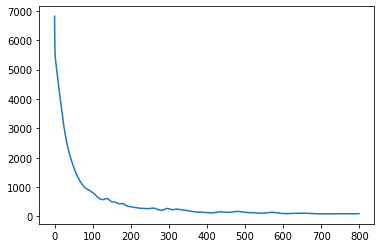

In [56]:
n, d_in, d_out, h = 64, 10000, 100, 60
epochs = 800
lr = 1e-4

x = torch.randn((n, d_in), device=device)
y = torch.randn((n, d_out), device=device)

class TwoLayerNet(torch.nn.Module):
  def __init__(self, d_in, d_out, h):

    super(TwoLayerNet, self).__init__()
    
    self.linear1 = torch.nn.Linear(d_in,h)
    self.linear2 = torch.nn.Linear(h,d_out)

  def forward(self, x):
      y = self.linear1(x).clamp(min=0)
      out = self.linear2(y)
      return out

mnew = TwoLayerNet(d_in, d_out, h)
optimizer = torch.optim.SGD(mnew.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss(reduction='sum')
error = []

for num in range(epochs):
    h = mnew(x)
    loss = loss_fn(h, y)
    print(loss.item())
    error.append(loss.item())

    mnew.zero_grad()
    loss.backward()

    with torch.no_grad():
      for param in mnew.parameters():
        param.data -= lr*param.grad

plt.plot(error)

